In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [55]:
X = pd.read_csv('X.csv').drop('Unnamed: 0',axis=1)
X['Readmitted'] = pd.read_csv('y.csv').x.map({'<30':'Readmitted','>30':'Not Readmitted','NO':'Not Readmitted'})

numeric = X.columns[:13]
categorical = X.columns[13:]

X[categorical] = X[categorical].apply(pd.Categorical)

target_counts = X.Readmitted.value_counts()

In [247]:
def plot_distrubution(A,column,order=None,hue='Readmitted'):   
    
    A_temp = A.groupby([column,hue])[column].count().\
               reset_index(name='Count').\
               sort_values(['Count'])

    plt.figure(figsize =(12,12))
    sns.barplot(data=A_temp,
                x=column,
                y='Count',
                hue=hue,
                order=order,
                palette=['red','blue'])

    plt.title(f'{column.title()} Distribution',
                 fontsize='x-large')
    plt.xlabel(f'{column.title()}',fontsize='large')
    plt.ylabel('Density',fontsize='large')
    plt.legend(frameon=False,
               fontsize='x-large')
    plt.tight_layout()
    plt.show()

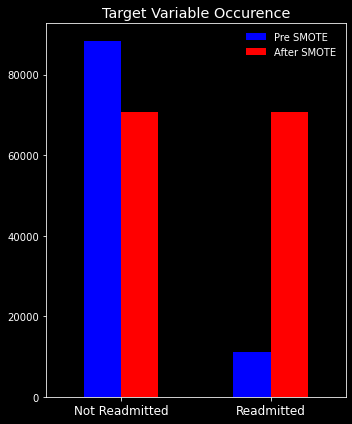

In [212]:
y_train = pd.read_csv('y_train.csv').readmitted
target_counts_smote = y_train.value_counts()

counts = pd.concat([target_counts.reset_index(), 
                    target_counts_smote.reset_index(drop=True)], 
                    axis=1,ignore_index=True).set_index(0)
counts.columns = ['Pre SMOTE','After SMOTE']

counts.plot(kind='bar',
            colormap='bwr',
            figsize=(5,6))
plt.xticks(rotation=0,
           fontsize='large')
plt.title('Target Variable Occurence',
          fontsize='x-large')
plt.xlabel('')
plt.legend(frameon=False)
plt.tight_layout()

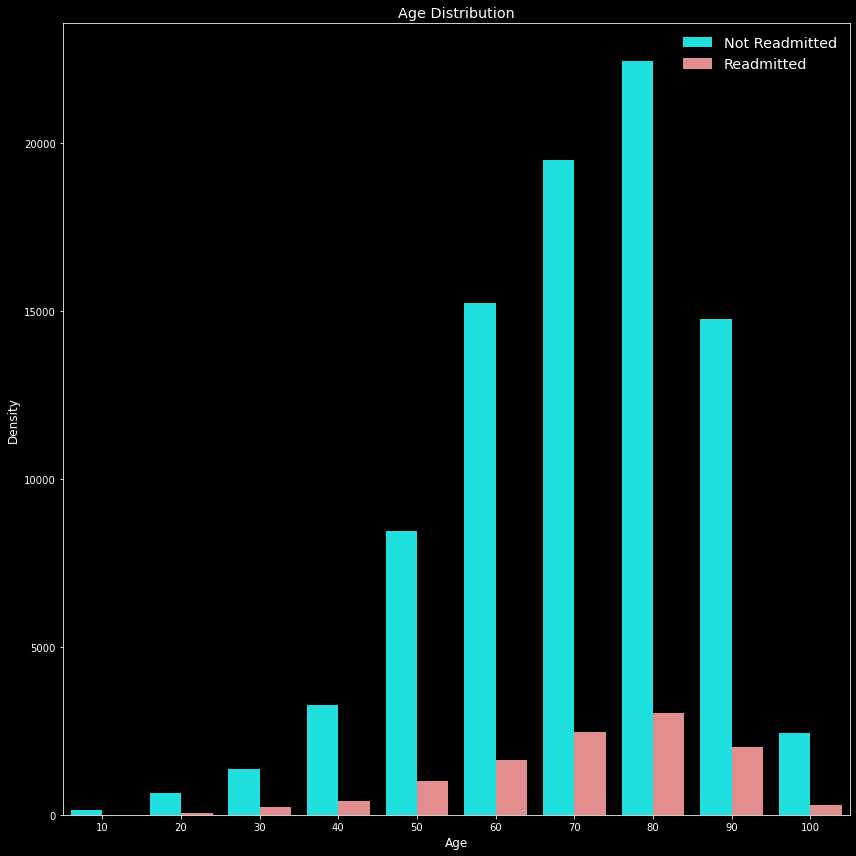

In [137]:
plot_distrubution(X,'age')

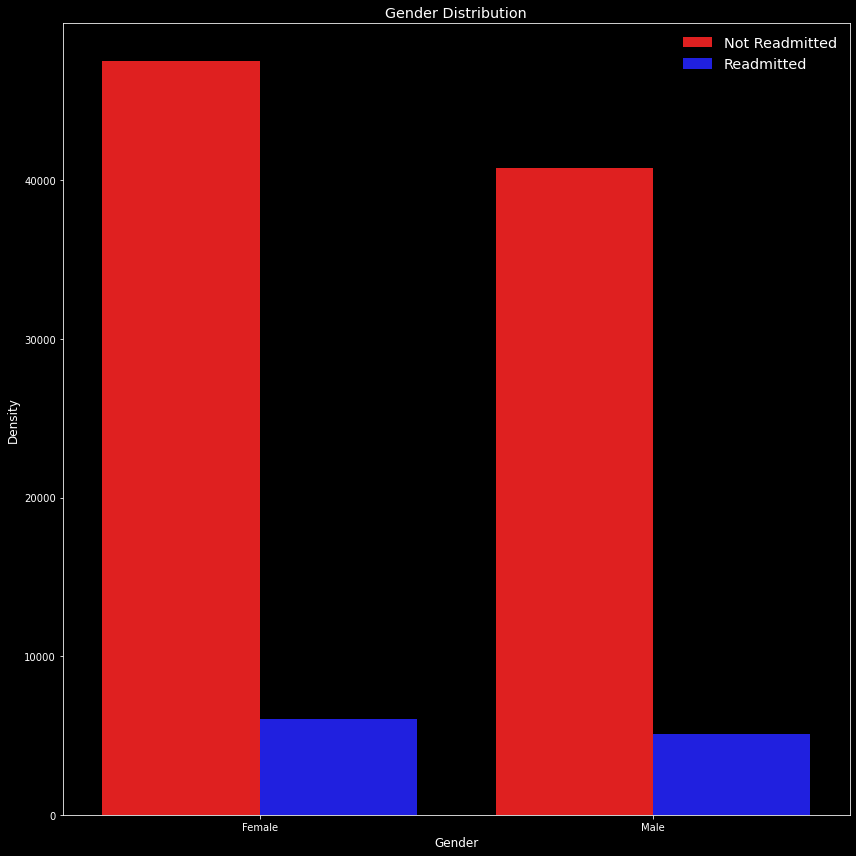

In [248]:
plot_distrubution(X,'gender')

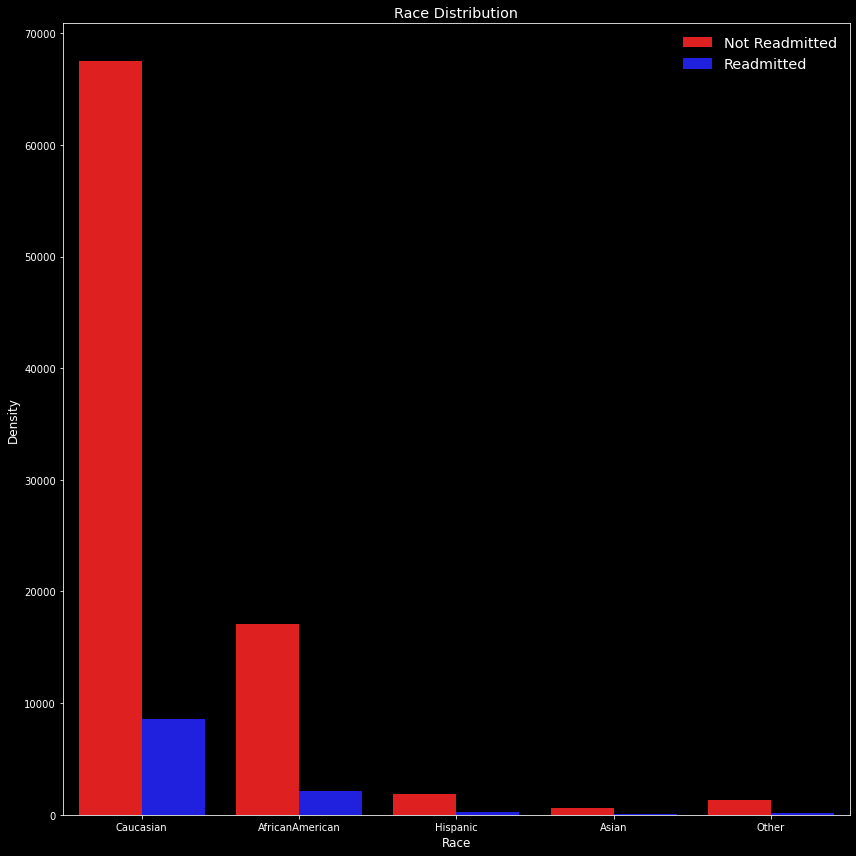

In [249]:
plot_distrubution(X,'race',['Caucasian','AfricanAmerican','Hispanic','Asian','Other'])

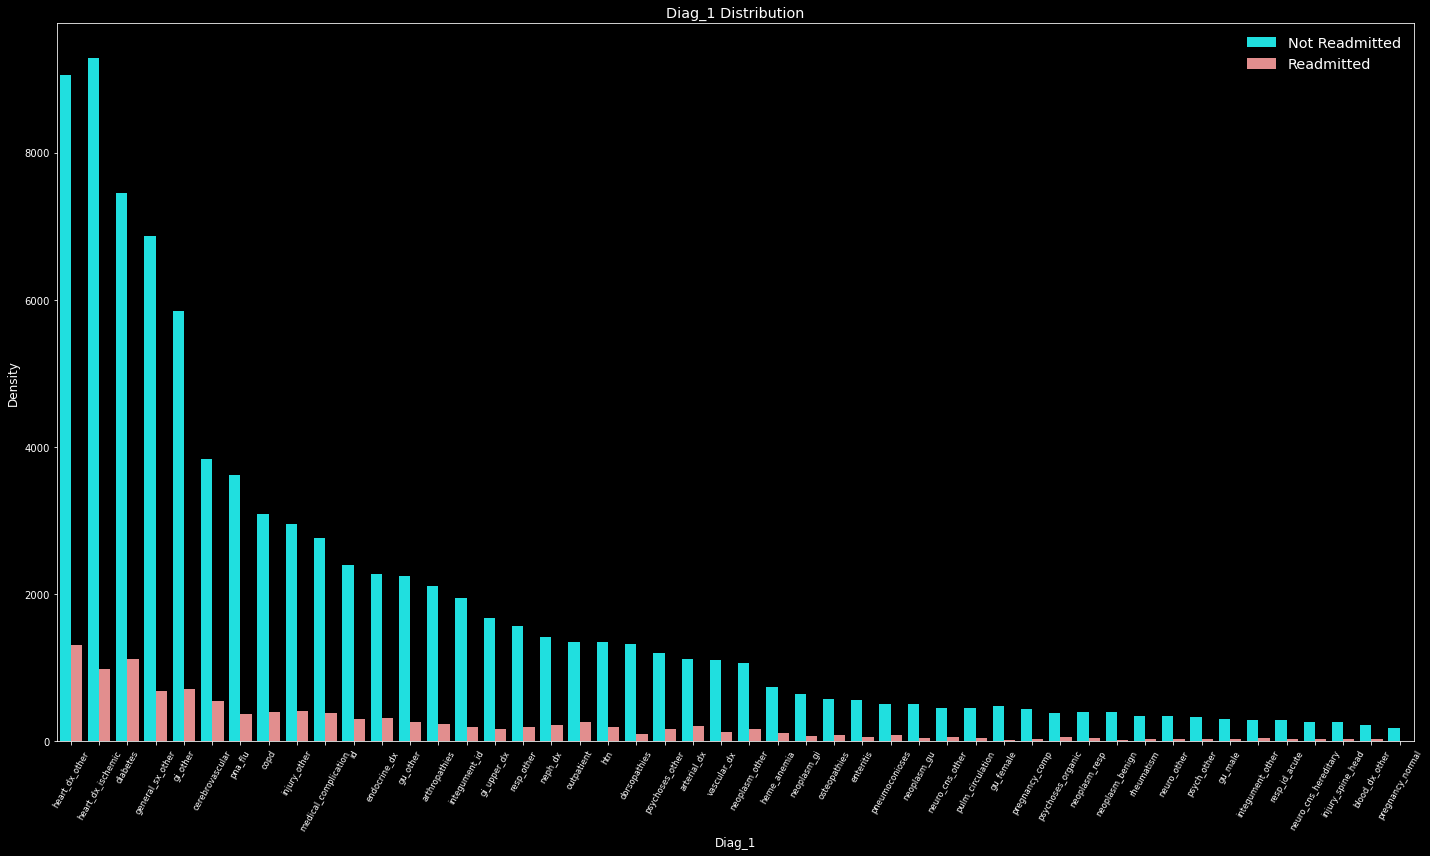

In [152]:
column,hue = 'diag_1','Readmitted'
order = X.groupby([column])[column].count().\
                  reset_index(name='Count').\
                  sort_values(['Count'],ascending=False).diag_1.values

A_temp = X.groupby([column,hue])[column].count().\
               reset_index(name='Count').\
               sort_values(['Count'])

plt.figure(figsize =(20,12))
sns.barplot(data=A_temp,
            x=column,
            y='Count',
            hue=hue,
            order=order,
            palette=['aqua','lightcoral'])

plt.title(f'{column.title()} Distribution',
             fontsize='x-large')
plt.xlabel(f'{column.title()}',
           fontsize='large')
plt.xticks(rotation=60,
           fontsize='small')
plt.ylabel('Density',fontsize='large')
plt.legend(frameon=False,
           fontsize='x-large')
plt.tight_layout()
plt.show()

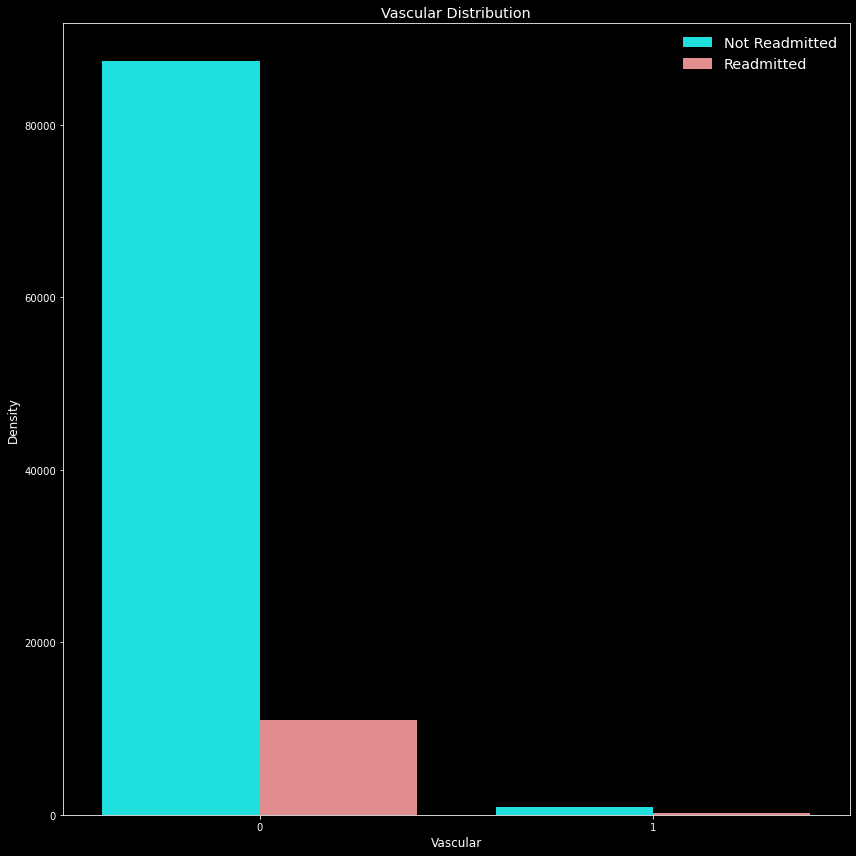

In [240]:
plot_distrubution(X,'vascular')

In [213]:
X.columns

Index(['age', 'weight', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'lab_procedures_per_day', 'procedures_per_day', 'medications_per_day',
       'race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1',
       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide.metformin', 'glipizide.metformin',
       'glimepiride.pioglitazone', 'metformin.pioglitazone', 'change',
       'diabetesMed', 'dka', 'hyperosmolarity', 'renal', 'neuro', 'vascular',
       'Readmitted'],
      dtype='object')

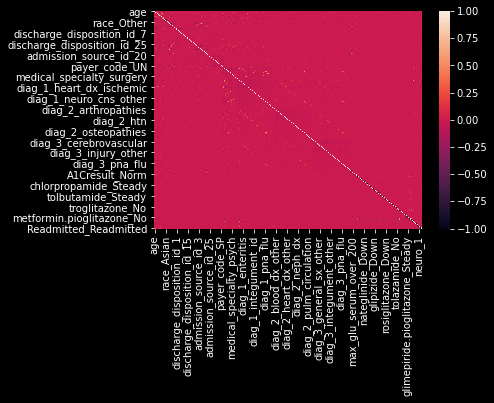

In [246]:
corr = pd.get_dummies(X).corr()

ax = sns.heatmap(corr)